<div dir='rtl'>
    
# پیش پردازش داده ها

</div>

In [1]:
import pandas as pd

In [2]:
data_set = pd.read_csv('diabetes.csv')
data_set.shape

(70692, 23)

In [3]:
data_set.dtypes

Unnamed: 0                     int64
Diabetes_binary              float64
HighBP                       float64
High Cholesterol             float64
Cholesterol Check            float64
BMI                          float64
Smoker                       float64
Stroke                       float64
HeartDiseaseorAttack         float64
Physical Activity            float64
Fruits                       float64
Veggies                      float64
Heavy Alcohol Consumption    float64
Any Health Care              float64
No Doctor because of Cost    float64
General Health                object
Mental Health                float64
Physical Health              float64
Difficulty Walking           float64
Sex                           object
Age                          float64
Education                     object
Income                        object
dtype: object

<div dir='rtl'>
    
### حذف داده های پوچ با مقادیر مناسب

</div>

In [4]:
# show all rows that have at least one NaN value
data_set[data_set.isnull().any(axis=1)]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


In [5]:
import numpy as np
data_set.Income.replace(['Unknown'], [np.NaN], inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 70692 non-null  int64  
 1   Diabetes_binary            70692 non-null  float64
 2   HighBP                     70692 non-null  float64
 3   High Cholesterol           70692 non-null  float64
 4   Cholesterol Check          70692 non-null  float64
 5   BMI                        70691 non-null  float64
 6   Smoker                     70692 non-null  float64
 7   Stroke                     70692 non-null  float64
 8   HeartDiseaseorAttack       70691 non-null  float64
 9   Physical Activity          70691 non-null  float64
 10  Fruits                     70690 non-null  float64
 11  Veggies                    70691 non-null  float64
 12  Heavy Alcohol Consumption  70691 non-null  float64
 13  Any Health Care            70690 non-null  flo

<div dir=rtl>
 با توجه به آمار بالا ، ستون هایی که فقط یک داده پوچ دارند را با مقدار میانگین یا مد پر می کنیم . ولی ستون هایی که دارای بیش از یک مقدار پوچ هستند به صورتی که هر سطر شامل آن ها بود ، آن را حذف می کنیم .
</div>

In [6]:
# remove rows that contains a colunm with at least two NaN values.
columns = data_set.isna().sum().to_dict()
for col, nan_num in columns.items():
    if nan_num > 1:
        data_set = data_set.dropna(subset=[col])

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70686 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 70686 non-null  int64  
 1   Diabetes_binary            70686 non-null  float64
 2   HighBP                     70686 non-null  float64
 3   High Cholesterol           70686 non-null  float64
 4   Cholesterol Check          70686 non-null  float64
 5   BMI                        70685 non-null  float64
 6   Smoker                     70686 non-null  float64
 7   Stroke                     70686 non-null  float64
 8   HeartDiseaseorAttack       70686 non-null  float64
 9   Physical Activity          70686 non-null  float64
 10  Fruits                     70686 non-null  float64
 11  Veggies                    70686 non-null  float64
 12  Heavy Alcohol Consumption  70686 non-null  float64
 13  Any Health Care            70686 non-null  flo

In [8]:
# fill rows that contains a colunm with one NaN value.
for col, nan_num in columns.items():
    if nan_num > 0:
        data_set[col].fillna(data_set[col].mode()[0], inplace=True)

In [9]:
data_set.isna().sum().sum()

0

<div dir=rtl>
 در این مرحله فاصله موجود در اسم ستون ها را حذف می کنیم و بجای آن کاراکتر '_ قرار می دهیم.'
</div>

In [10]:
#rename column names
columns_dict = {}
columns = data_set.columns.values.tolist()
for col in columns:
    columns_dict[col] = col.lower().replace(" ", "_")
    
columns_dict['HeartDiseaseorAttack'] = 'heart_disease_or_attack'
data_set.rename(columns = columns_dict, inplace = True)
columns = data_set.columns.values.tolist()
columns

['unnamed:_0',
 'diabetes_binary',
 'highbp',
 'high_cholesterol',
 'cholesterol_check',
 'bmi',
 'smoker',
 'stroke',
 'heart_disease_or_attack',
 'physical_activity',
 'fruits',
 'veggies',
 'heavy_alcohol_consumption',
 'any_health_care',
 'no_doctor_because_of_cost',
 'general_health',
 'mental_health',
 'physical_health',
 'difficulty_walking',
 'sex',
 'age',
 'education',
 'income']

<div dir='rtl'>
    
### نرمالایز کردن داده ها

</div>

In [11]:
data_set.income = data_set.income.str[3:].astype('int64')
numeric_columns = ['mental_health', 'physical_health','age', 'bmi', 'income']
minimum = data_set[numeric_columns].min()
maximum = data_set[numeric_columns].max()
data_set[numeric_columns] = (data_set[numeric_columns] - minimum) / (maximum - minimum)
data_set.drop(['unnamed:_0'], axis=1, inplace=True)

In [12]:
data_set

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,...,any_health_care,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,sex,age,education,income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.000000,1.0,female,1.000000,Cat6,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,0.428571


<div dir='rtl'>
    
### one hot encoding

</div>

In [15]:
#OneHotEncoding

def one_hot_ecoding(column_name: str, data_set):
    encoder = pd.get_dummies(data_set[column_name], prefix=column_name+'_')
    data_set = data_set.join(encoder)
    data_set.drop(column_name, axis=1, inplace=True)
    return data_set

data_set = one_hot_ecoding('general_health', data_set)
data_set = one_hot_ecoding('sex', data_set)
data_set = one_hot_ecoding('education', data_set)


data_set

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,...,general_health__Medium,general_health__Very Low,sex__female,sex__male,education__Cat1,education__Cat2,education__Cat3,education__Cat4,education__Cat5,education__Cat6
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,0,1,0,0,0
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0,1,1,0,0,0,0,0,0,1
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0


<div dir='rtl'>
    
### جدا سازی ستون برچسب

</div>

In [16]:
label = data_set[['diabetes_binary']]
data_set.drop('diabetes_binary', axis=1, inplace=True)
data_set

,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,veggies,...,general_health__Medium,general_health__Very Low,sex__female,sex__male,education__Cat1,education__Cat2,education__Cat3,education__Cat4,education__Cat5,education__Cat6
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0
70688,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
70689,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [17]:
label

,diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


<div dir='rtl'>
    
# ساخت مدل طبقه بند

</div>

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_set.values, label.values, test_size=0.3, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49480, 31) (21206, 31) (49480,) (21206,)


In [241]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:03


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc
from xgboost import XGBClassifier


model = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=1,
    random_state=123,
    eval_metric=auc,
    verbosity=1,
)
print(model.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': <function auc at 0x7fb9df14c3a0>, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': 1}


<div dir='rtl'>
    
## فیت کردن مدل

</div>

In [20]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function auc at 0x7fb9df14c3a0>, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=123, reg_alpha=0, reg_lambda=1, ...)


<div dir='rtl'>
    
## ارزیابی مدل و ماتریس آشفتگی

</div>

In [21]:
print(f'accuracy = {accuracy}')

accuracy = 0.7565783268886165


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75     10672
         1.0       0.73      0.80      0.77     10534

    accuracy                           0.76     21206
   macro avg       0.76      0.76      0.76     21206
weighted avg       0.76      0.76      0.76     21206



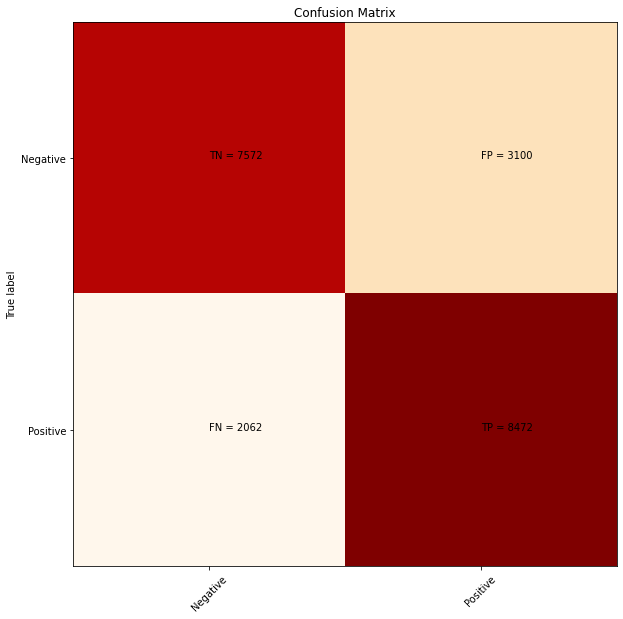

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
classes = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [256]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 236.8 kB/s eta 0:00:001m341.7 kB/s eta 0:00:01


<div dir='rtl'>
    
# تنظیم هایپرپارامترها

</div>

<div dir='rtl'>
    
 در این قسمت به کمک GridSearchCV کار Parameter Tuning را انجام میدهیم. یعنی چهار پارامتر learning_rate, max_depth, n_estimators, colsample_bytree را با مقادیر مختلف تست میکنیم تا ببینیم به ازای کدام یک عملکرد مدل بهتر است.

</div>

In [27]:
def my_roc_auc_score(model, x, y):
  return roc_auc_score(y, model.predict_proba(x)[:, 1])

parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.3],
              'max_depth': [2, 3, 4],
              'n_estimators': [100, 200, 300],
              'colsample_bytree': [0.8, 1]}

gs = GridSearchCV(model, parameters,cv=3, scoring=my_roc_auc_score)
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=<function auc at 0x7fb9df14c3a0>,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, m...
                                     max_depth=4, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=200, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=123, reg_alpha=0,
                                     reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7fb9dec52ca0>)

In [28]:
best_parameters = gs.best_params_
best_score = gs.best_score_
print('best score:', best_score)
for param_name in sorted(best_parameters.keys()):
    print(f'{param_name} : {best_parameters[param_name]}')

best score: 0.8294027095277903
colsample_bytree : 1
learning_rate : 0.05
max_depth : 4
n_estimators : 200


In [29]:
y_pred = gs.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7562010751674054

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75     10672
         1.0       0.73      0.80      0.77     10534

    accuracy                           0.76     21206
   macro avg       0.76      0.76      0.76     21206
weighted avg       0.76      0.76      0.76     21206



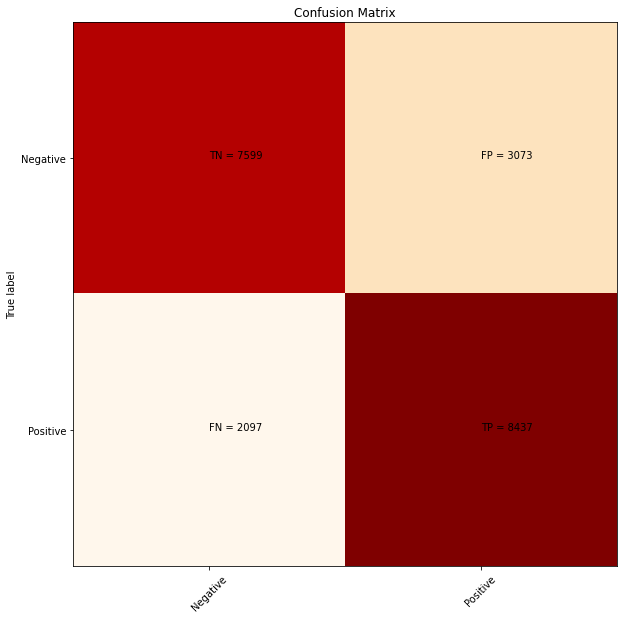

In [31]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
classes = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
for key, value in gs.cv_results_.items():
    print(f'{key} : {value}')

mean_fit_time : [ 1.53995633  3.13738163 10.9444464   5.03171929 10.69511509 14.38908021
  2.58923125  4.31792943  6.76754125  1.57850742  2.980781    5.30042672
  2.00018787  3.8335735   6.59798614  2.16729013  4.56202626  6.50478999
  1.4937102   2.89626129  4.46871638  1.97064702  3.5249277   5.36836274
  1.9853065   5.36588732  6.89003825  1.6475598   3.36478901  6.34881822
  2.38108055  3.71778774  6.04112991  2.52726404 11.17861525  8.06873027
  1.7526319   3.64480249  5.2339739   3.63022391 10.63221439  6.18569024
  2.2917285   4.98710688  7.71009986  1.60354431  3.19570104  4.97577151
  2.06190666  3.72884536  6.0309902   2.4810973   8.95214128 11.23678875
  1.94789028  3.54029942  5.72178841  2.45472868  4.37974826  6.86193291
  2.46437399  5.68664797 13.3038245   1.86133782  3.4148674   5.5990243
  2.56761432  3.93120805  6.04353809  2.45690974  5.60574277  7.46970224]
std_fit_time : [0.10724198 0.41166985 4.05255405 1.59793466 1.19964888 7.39600126
 0.1700122  0.20475536 0.4

<div dir='rtl'>
    
# ‫تصویر سازی تغییر پارامترها‬

</div>

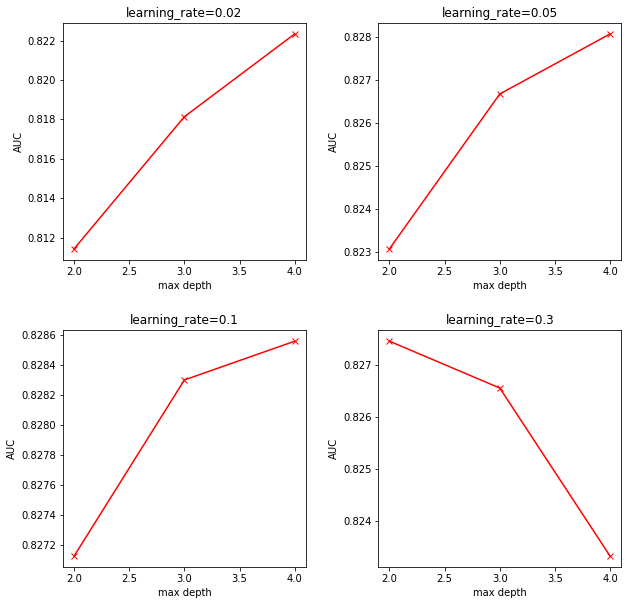

In [50]:
max_depth = [2, 3, 4]
scores = [[], [], [], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.02:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.05:
    scores[1].append(gs.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.1:
    scores[2].append(gs.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.3:
    scores[3].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
learning_rate = ["0.02", "0.05", "0.1", "0.3"]
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(max_depth, score, 'xr-')
    plt.title("learning_rate=" + learning_rate[count])
    plt.ylabel("AUC")
    plt.xlabel("max depth")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

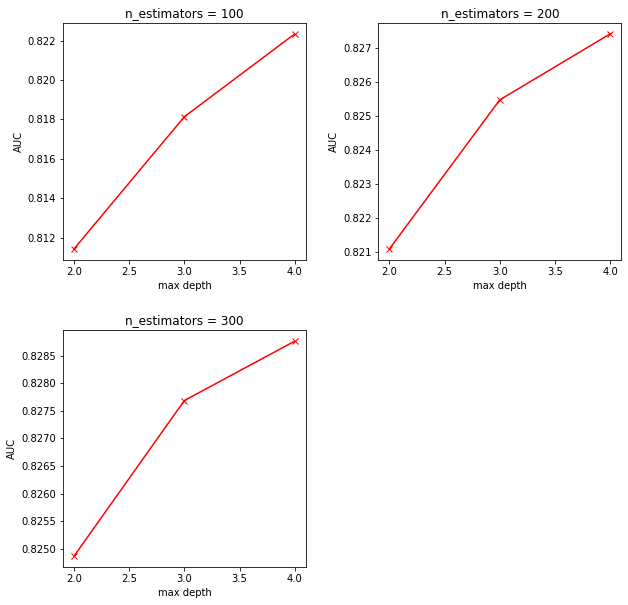

In [51]:
max_depth = [2, 3, 4]
scores = [[], [], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 100:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 200:
    scores[1].append(gs.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 300:
    scores[2].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
n_estimators = ['n_estimators = 100', 'n_estimators = 200', 'n_estimators = 300']
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(max_depth, score, 'xr-')
    plt.title(n_estimators[count])
    plt.ylabel("AUC")
    plt.xlabel("max depth")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

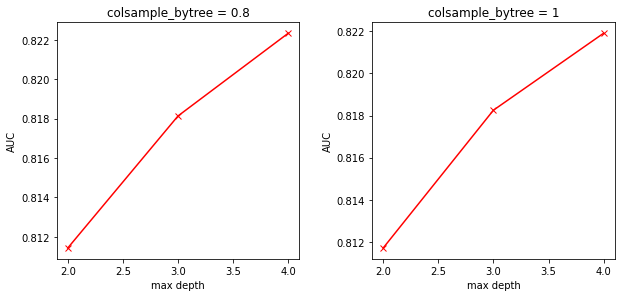

In [52]:
max_depth = [2, 3, 4]
scores = [[], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['n_estimators'] == 100 and res['colsample_bytree'] == 1:
    scores[1].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
n_estimators = ['colsample_bytree = 0.8', 'colsample_bytree = 1']
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(max_depth, score, 'xr-')
    plt.title(n_estimators[count])
    plt.ylabel("AUC")
    plt.xlabel("max depth")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

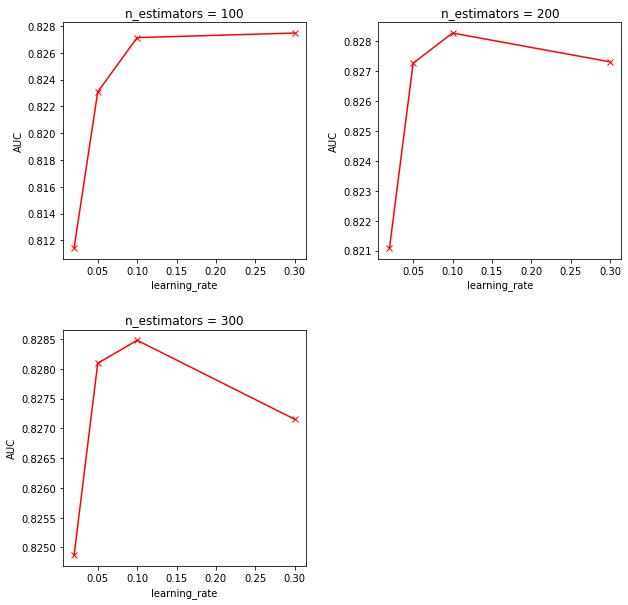

In [53]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
scores = [[], [], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 100:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 200:
    scores[1].append(gs.cv_results_['mean_test_score'][index])
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 300:
    scores[2].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
n_estimators = ['n_estimators = 100', 'n_estimators = 200', 'n_estimators = 300']
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(learning_rate, score, 'xr-')
    plt.title(n_estimators[count])
    plt.ylabel("AUC")
    plt.xlabel("learning_rate")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

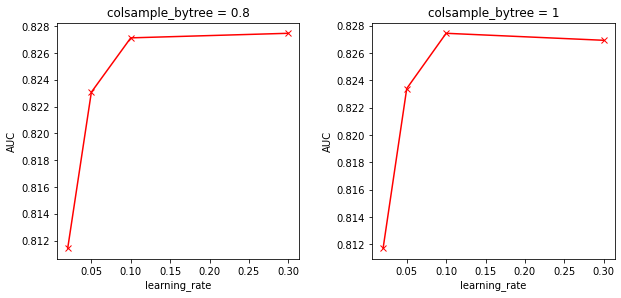

In [54]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
scores = [[], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['n_estimators'] == 100 and res['max_depth'] == 2 and res['colsample_bytree'] == 0.8:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['max_depth'] == 2 and res['colsample_bytree'] == 1:
    scores[1].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
colsample_bytree = ['colsample_bytree = 0.8', 'colsample_bytree = 1']
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(learning_rate, score, 'xr-')
    plt.title(colsample_bytree[count])
    plt.ylabel("AUC")
    plt.xlabel("learning_rate")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

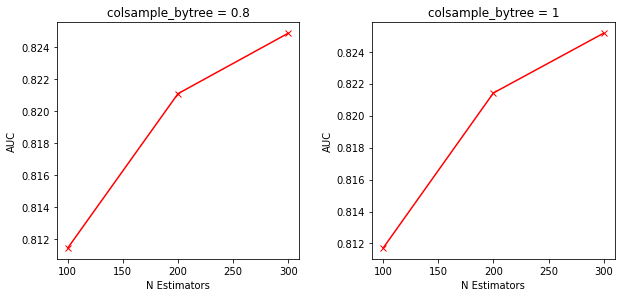

In [55]:
n_estimators = [100, 200, 300]
scores = [[], []]
for index, res in enumerate(gs.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['max_depth'] == 2 and res['colsample_bytree'] == 0.8:
    scores[0].append(gs.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['max_depth'] == 2 and res['colsample_bytree'] == 1:
    scores[1].append(gs.cv_results_['mean_test_score'][index])

width_height_1 = (10., 5.)
plt.figure(figsize=(10, 10))
subplot_number = 221
colsample_bytree = ['colsample_bytree = 0.8', 'colsample_bytree = 1']
for count, score in enumerate(scores):
    plt.subplot(subplot_number)
    plt.plot(n_estimators, score, 'xr-')
    plt.title(colsample_bytree[count])
    plt.ylabel("AUC")
    plt.xlabel("N Estimators")
    subplot_number += 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)